# 4 - Neural Net Visualization 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Define neuralplot() Function 

In [60]:
# import time

def neuralplot(layers, connect=True, grid=False, linewidth=0.1):
    
    %matplotlib notebook
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')

    sx, sy, sz = [], [], []

    temp = True
    x_max, y_max = 0,0
    last_layer = 0
    all_xyz, line_xyz = [], []
    all_color, all_marker = [], []
    color_count,color_count1 = 0,0
    layer_type = []
    
    def full_connection(x1=1, x2=1, y1=1, y2=1, x11=1, x21=1, y11=1, y21=1, z1=1, z2=1, c='r'):
        for i in np.arange(x1,x2+1,1): # 0 1 2 3         X
            for j in np.arange(x11,x21+1,1): # 0 1 2 3   X
                for k in np.arange(y1,y2+1,1): #  1 2
                    for l in np.arange(y11,y21+1,1): # 1 2
                        ax.plot([i, j], [z1, z2], [k, l], c=c,linewidth=linewidth)
                        
    for lay in layers:
        x = lay[0]
        try:
            y = lay[1]
        except:
            y = 1
        try:
            z = lay[2]
        except:
            z = 1
        try:
            if lay[3] == 'rgb':
                for i in str(lay[3]):
                    all_color.append(i)
            else:
                for i in lay[3]*lay[2]:
                    all_color.append(i)                
        except:
            for i in 'r'*lay[2]:
                all_color.append(i)
        try:
            all_marker.append(lay[4])
        except:
            all_marker.append('o')
            
        try:
            layer_type.append(lay[5])
        except:
            layer_type.append('nan')

        if x_max < x:
            x_max = x
        if y_max < y:
            y_max = y

        single_layer = []
        for k in range(z):
            mx,my,mz = [],[],[]
            for i in range(y):            
                ox = [j for j in range(x)]
                mx.append(ox)

            for i in range(y):
                oy = [j for j in (np.ones(x,dtype=int) * i)]
                my.append(oy)

            for i in range(x):
                oz = [j for j in (np.ones(y,dtype=int) * last_layer)]
                mz.append(oz)
            last_layer += 2
            single_layer.append([mx,my,mz])
        all_xyz.append(single_layer)
        last_layer += 4
        
    last_a,last_b,last_c = [0,0], [0,0], [0,0]    
    for i, marker, l_type in zip(all_xyz, all_marker, layer_type):
        my_a,my_b,my_c = [],[],[] 
        for j in i:
            my_x, my_y, my_z = [],[],[]           
            for k in j[0]:
                k = [a + ((x_max-len(k))/2) for a in k]                
                my_x += k
            my_a.append([k[0],k[-1]])
            temp_list_l=[]
            for l in j[1]:
                l = [b + ((y_max-(j[1][-1][-1]+1))/2) for b in l]
                my_y += l
                temp_list_l.append(l[0])
            
            my_b.append([temp_list_l[0],temp_list_l[-1]])
            for k in j[2]:
                my_z += k
            my_c.append([k[0],k[-1]])
            ax.scatter(my_x, my_z, my_y, c=all_color[color_count], marker=marker, s=20)
            color_count+=1
         
        if l_type == 'fc':        
            for c in my_c:
                a,b,c = my_a[0],my_b[0], c
                if temp:
                    temp = False
                    last_a,last_b,last_c = a,b,c
                    continue
                full_connection(a[0],a[1],b[0],b[1], last_a[0],last_a[1],last_b[0],last_b[1],c[0],last_c[0], c=all_color[color_count1])
                color_count1+=1
                last_a,last_b,last_c = a,b,c    
    
    # Hide axes ticks
    if grid == False:
        ax.grid(False)
        plt.axis('off')

    plt.show()
#     plt.savefig('fig_new.png', dpi=300)

<IPython.core.display.Javascript object>


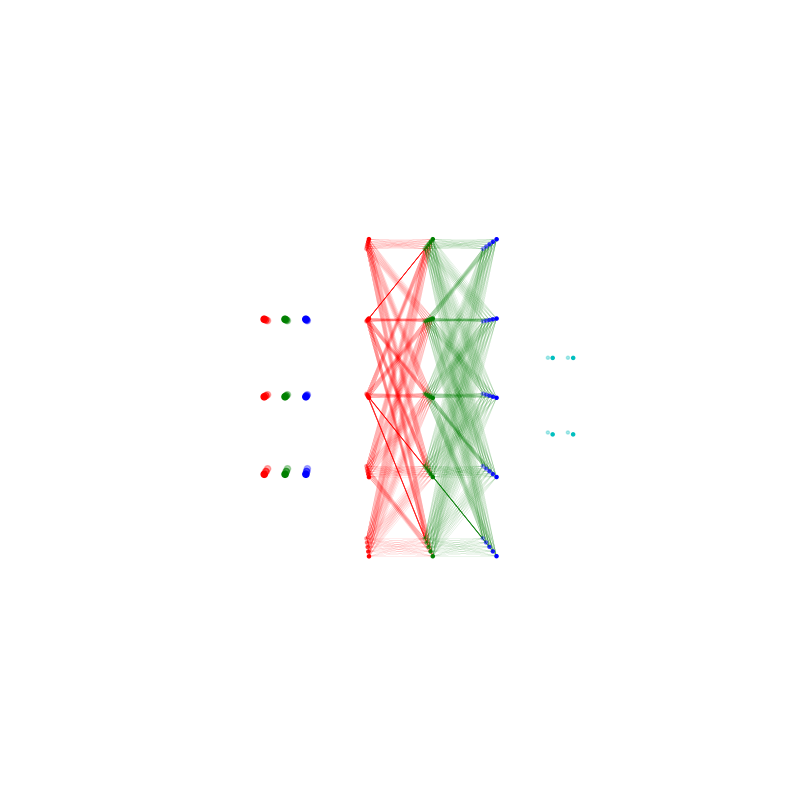

In [66]:
layers = [(3, 3, 3, 'rgb','o', 'nan'),(5, 5, 1, 'r','.', 'fc'),(5, 5, 1, 'g','.', 'fc'),(5, 5, 1, 'b','.', 'fc'),(2,2, 2, 'c','.', 'nan')]
neuralplot(layers, grid=False, connect=False, linewidth=.05)